In [8]:
import pandas as pd
pokemon = pd.read_csv('https://raw.githubusercontent.com/we-b/datasets_for_ai/master/poke.csv')
pokemon.head()


,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,Bulbasaur,318,45,49,49,65,65,45,False
1,Ivysaur,405,60,62,63,80,80,60,False
2,Venusaur,525,80,82,83,100,100,80,False
3,Charmander,309,39,52,43,60,50,65,False
4,Charmeleon,405,58,64,58,80,65,80,False


In [9]:
import numpy as np
X=np.array(pokemon)

# ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']の特徴量を取得
X=X[:,2:8]

In [5]:
# PCAクラスの読み込み
from sklearn.decomposition import PCA
# 主成分数を2に設定したインスタンスを生成
pca=PCA(n_components=2)
# PCAのインスタンスでポケモンのデータを学習
pca.fit(X)
# PCAで主成分を抽出
X_pca=pca.transform(X)
print(X_pca)
#1列目が第一主成分軸、2列目が第二主成分軸の値

[[-32.51693378 -10.25507669]
 [  2.48189733  -9.98844724]
 [ 50.64577331  -7.87828927]
 [-38.8412626  -21.17420807]
 [  0.18699222 -21.63253347]
 [ 52.80307074 -23.0589564 ]
 [-37.16150087   4.62105899]
 [ -0.5666316    6.06844414]
 [ 49.95705578   7.5024355 ]
 [-88.0191591   -1.34868221]
 [-84.05216172  12.39571392]
 [ -0.31787084 -33.10710486]
 [-87.94563852  -6.20266177]
 [-83.97864115   7.54173437]
 [ -3.18890354  -4.29238677]
 [-64.47486149  -8.30903105]
 [-24.9987157   -4.50420808]
 [ 26.29733455  -8.03715293]
 [-65.50918035 -14.45520928]
 [ -0.58471256 -13.16984504]
 [-60.6754789  -13.40493038]
 [ 10.94588214  -9.00622264]
 [-48.04247984  -5.63352518]
 [ 12.16236514  -2.99582772]
 [-37.27241343 -32.84966326]
 [ 32.35290877 -35.24798315]
 [-49.38587465  45.54208419]
 [ 10.81897033  48.17978165]
 [-53.69156007   8.76647879]
 [-17.56865308  10.34909727]
 [ 39.46390376  15.06451855]
 [-54.02711002  -1.14833392]
 [-17.31567451   1.483224  ]
 [ 39.94415123   3.62144418]
 [-29.59757011

In [10]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


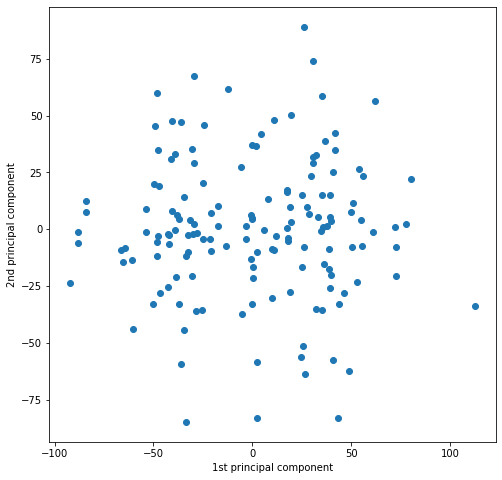

In [12]:
x=X_pca[:,0]
y=X_pca[:,1]
fig, ax=plt.subplots(figsize=(8,8))
plt.scatter(x,y)
plt.xlabel('1st principal component')  #第一主成分
plt.ylabel('2nd principal component')  #第二主成分
plt.show()


In [14]:
#寄与率を確認
pca.explained_variance_ratio_

array([0.38949774, 0.21741941])

In [16]:
# 主成分数を6に設定したインスタンスを生成
pca = PCA(n_components=6)
# PCAのインスタンスでポケモンのデータを学習
pca.fit(X)
# 寄与率を確認
pca.explained_variance_ratio_

array([0.38949774, 0.21741941, 0.17187517, 0.1166044 , 0.05423114,
       0.05037215])

In [17]:
pca.components_


array([[ 0.41915485,  0.41490581,  0.29426427,  0.49468917,  0.47196228,
         0.31321743],
       [ 0.27777556,  0.39575965,  0.52446972, -0.39295343, -0.13523332,
        -0.56431028],
       [ 0.72368963, -0.28920925, -0.50029365, -0.05107798,  0.19045514,
        -0.32164494],
       [-0.0696359 , -0.49027105,  0.36943966,  0.63496562, -0.10290397,
        -0.45224873],
       [ 0.35593287, -0.5280527 ,  0.47379403, -0.31311023, -0.15047744,
         0.4993094 ],
       [-0.30312687, -0.26149594,  0.16455963, -0.31151551,  0.8303359 ,
        -0.16172349]])

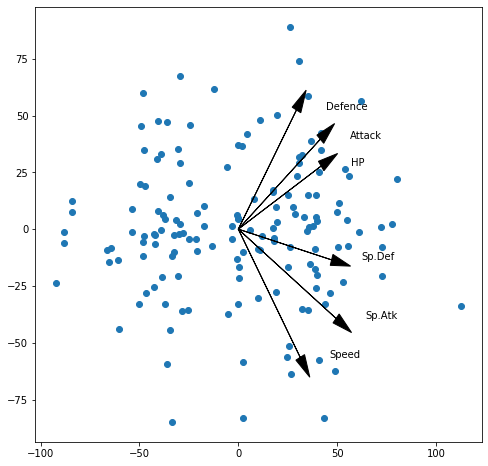

In [18]:
attr=['HP','Attack','Defence','Sp.Atk','Sp.Def','Speed']

fig, ax =plt.subplots(figsize=(8,8))
plt.scatter(x,y)
for i in range(pca.components_.shape[1]):
    x1=pca.components_[0,i]*100
    y1=pca.components_[1,i]*100
    ax.arrow(0,0,x1,y1,head_width=5,head_length=10,fc="k",ec='k')
    plt.text(x1+15,y1,attr[i])
    

In [20]:
#tSNEによるMNISTデータセット分析
%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn.decomposition import PCA


In [21]:
mnist=datasets.load_digits()

In [22]:
print(mnist.data.shape)

(1797, 64)


In [23]:
print(mnist.target.shape)

(1797,)


In [24]:
X_compressed=PCA(n_components=2).fit_transform(mnist.data)

In [25]:
print(X_compressed.shape)
#二次元になった

(1797, 2)


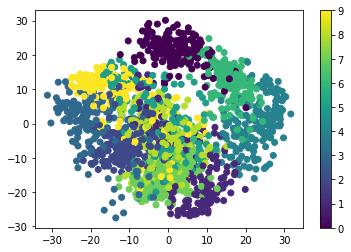

In [26]:
plt.scatter(X_compressed[:,0],X_compressed[:,1],c=mnist.target)
plt.colorbar()

In [27]:
from sklearn.manifold import TSNE

In [28]:
mnist=datasets.load_digits()

In [29]:
print(mnist.data.shape)

(1797, 64)


In [30]:
print(mnist.target.shape)

(1797,)


In [31]:
X_compressed =TSNE(n_components=2,random_state=0).fit_transform(mnist.data)

In [32]:
print(X_compressed.shape)

(1797, 2)


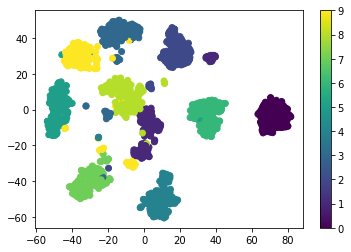

In [33]:
plt.scatter(X_compressed[:,0],X_compressed[:,1],c=mnist.target)
plt.colorbar()